In [25]:
#2021.06.23. WED
#Hankyeong

##CH10. K-means 군집화(Clustering)
#00. 패키지 호출 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score 

#00-1. 시각화 옵션 설정하기. 
%matplotlib inline 

#01. iris 데이터셋으로 군집화하기. 
#(1) 데이터셋 불러오기 
iris = load_iris() 
 
#(2) 데이터프레임으로 변환하기. 
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
#(3) 스케일링 처리하기. 
scaler = StandardScaler()
iris_scaling = scaler.fit_transform(iris.data)

#(4) kmeans 모델 할당하기. 
kmeans = KMeans(n_clusters=3)

#(5) 모델 학습하기. 
kmeans.fit(iris_scaling)

KMeans(n_clusters=3)

In [27]:
#(6) cluster_num 변수 추가하기. 
df_iris['cluster_num'] = kmeans.labels_
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_num
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [28]:
#MEMO. cluster_num은 무작위로 정의된 값이니 신경쓰지 않아도됨. 단지 그들끼리 군집화가 잘됐는지를 봐야함. 

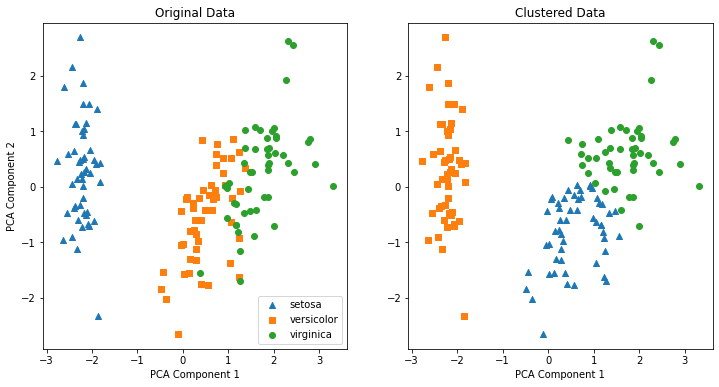

In [29]:
#02. 군집 시각화하기. 
#(1) 주성분 분석을 통해 2차원으로 축소하기. 
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaling)
df_iris_pca = pd.DataFrame(iris_pca, columns=['PC1','PC2'])
df_iris_pca['target'] = iris.target
df_iris_pca['cluster_num'] = kmeans.labels_

#(2) 군집 시각화하고 원본과 비교하기. 
markers = ['^', 's', 'o']
fig, axs = plt.subplots(figsize= (12,6), ncols =2, nrows= 1)
for k, column in enumerate(['target','cluster_num'])    :
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df_iris_pca[df_iris_pca[column] == i ]['PC1']
        y_axis_data = df_iris_pca[df_iris_pca[column] == i ]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker,label = iris.target_names[i])

    if k == 0                                           : 
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else                                                : 
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

In [30]:
#03. 클러스터링 평가하기. 
#(1) silhouette_coef 변수 추가하기.
score_samples = silhouette_samples(iris_scaling, df_iris['cluster_num'])
df_iris['silhouette_coef'] = score_samples
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_num,silhouette_coef
0,5.1,3.5,1.4,0.2,0,1,0.734195
1,4.9,3.0,1.4,0.2,0,1,0.568274
2,4.7,3.2,1.3,0.2,0,1,0.677547
3,4.6,3.1,1.5,0.2,0,1,0.620502
4,5.0,3.6,1.4,0.2,0,1,0.728474
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,0.462280
146,6.3,2.5,5.0,1.9,2,0,0.229925
147,6.5,3.0,5.2,2.0,2,2,0.381212
148,6.2,3.4,5.4,2.3,2,2,0.387144


In [33]:
#(2) silhouette_score 구하기. 
silhouette_score(iris_scaling, df_iris['cluster_num'])

0.45994823920518635